In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import pandas as pd
Input_path = 'C:/Users/italo/Desktop/Proyecto ISB/Codigo/EMG-data.csv'
df = pd.read_csv(Input_path)
print(df.head())
print(df.shape)

   time  channel1  channel2  channel3  channel4  channel5  channel6  channel7  \
0     1   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000   
1     5   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000   
2     6  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
3     7  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
4     8  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   

   channel8  class  label  
0  -0.00001      0      1  
1  -0.00001      0      1  
2   0.00001      0      1  
3   0.00001      0      1  
4   0.00001      0      1  
(4237907, 11)


In [4]:
print("class :", df["class"].unique())
print()
#print("Labels :",df["label"].unique()) # 36 people hand gesture data
#print()
print("Value Count :\n",df["class"].value_counts())

class : [0 1 2 3 4 5 6 7]

Value Count :
 class
0    2725157
6     253009
5     251733
4     251570
1     250055
3     249494
2     243193
7      13696
Name: count, dtype: int64


In [5]:
features = df.drop(columns=["label","class","time"])
display(features.head())
#print(features.shape())

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001
1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001
2,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001
3,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001
4,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001


In [6]:
Class = df["class"]
print(Class.unique())
#print(Class.shape())

[0 1 2 3 4 5 6 7]


In [7]:
print(type(Class))
print(type(features))

Class = Class.values
features = features.values

print(type(Class))
print(type(features))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [8]:
# split in training 70%, validation 10 %,  test 20% test 
from sklearn.model_selection import train_test_split
# 80 and 20
x_train, x_test, y_train, y_test = train_test_split(features, Class, test_size=0.2, random_state=1)

In [9]:
# Normalizing data
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

x_train -= mean
x_train /= std

x_test -= mean
x_test /= std

In [10]:
# one hot encoding Labels
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [11]:
# creating a function for plotting

def plot(loss,val_loss,acc,val_acc):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('acc')
    plt.legend()
    plt.show()

In [12]:
#################################

In [13]:
from tensorflow.keras import layers, Sequential, optimizers, Input, Model

input_tensor = Input(shape=(8,))
x = layers.Dense(1024, activation='relu')(input_tensor)
y = layers.Dense(512, activation='relu')(x)
z = layers.Dense(256, activation='relu')(y)
z = layers.Dense(128, activation='relu')(z)
z = layers.Dense(64, activation='relu')(z)
z = layers.Dense(32, activation='relu')(z)
z = layers.Dense(128, activation='relu')(y) # acyclic graghs of layers
z = layers.Dense(64, activation='relu')(z)
z = layers.Dense(32, activation='relu')(z)
output_tensor = layers.Dense(8, activation='softmax')(z)

model = Model(input_tensor, output_tensor)

#SGD #RMSprop #Adam #Adadelta #Adagrad ##Adamax ###Nadam #Ftrl
opt = optimizers.Nadam(learning_rate=1e-3)
model.compile(optimizer = opt, 
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

#model.summary()

In [14]:
def callbacks(Log, Dir):
    import tensorflow as tf
    import os

    Filepath = Log  # Ajustar nombre de la variable para mayor claridad
    logdir = os.path.join(Filepath, Dir)
    
    callbacks_list = [
        tf.keras.callbacks.TensorBoard(
            log_dir=logdir,  # Ruta para logs de TensorBoard
            histogram_freq=1,
        ),
        tf.keras.callbacks.EarlyStopping(  # Detener si no mejora
            monitor='val_accuracy', 
            patience=2,
        ),
        tf.keras.callbacks.ModelCheckpoint(
            filepath=os.path.join(Filepath, "best_model.keras"),  # Ruta válida para guardar el modelo
            monitor='val_loss', 
            save_best_only=True,
        )
    ]
    return callbacks_list


Epoch 1/200
5298/5298 ━━━━━━━━━━━━━━━━━━━━ 49s 9ms/step - accuracy: 0.6429 - loss: 0.9465 - val_accuracy: 0.6484 - val_loss: 0.8871
Epoch 2/200
5298/5298 ━━━━━━━━━━━━━━━━━━━━ 48s 9ms/step - accuracy: 0.6499 - loss: 0.8809 - val_accuracy: 0.6543 - val_loss: 0.8655
Epoch 3/200
5298/5298 ━━━━━━━━━━━━━━━━━━━━ 50s 10ms/step - accuracy: 0.6573 - loss: 0.8566 - val_accuracy: 0.6635 - val_loss: 0.8398
Epoch 4/200
5298/5298 ━━━━━━━━━━━━━━━━━━━━ 58s 11ms/step - accuracy: 0.6681 - loss: 0.8277 - val_accuracy: 0.6774 - val_loss: 0.8108
Epoch 5/200
5298/5298 ━━━━━━━━━━━━━━━━━━━━ 57s 11ms/step - accuracy: 0.6825 - loss: 0.7963 - val_accuracy: 0.6904 - val_loss: 0.7809
Epoch 6/200
5298/5298 ━━━━━━━━━━━━━━━━━━━━ 69s 13ms/step - accuracy: 0.6971 - loss: 0.7635 - val_accuracy: 0.7024 - val_loss: 0.7588
Epoch 7/200
5298/5298 ━━━━━━━━━━━━━━━━━━━━ 71s 13ms/step - accuracy: 0.7114 - loss: 0.7342 - val_accuracy: 0.7154 - val_loss: 0.7301
Epoch 8/200
5298/5298 ━━━━━━━━━━━━━━━━━━━━ 72s 14ms/step - accuracy: 0.

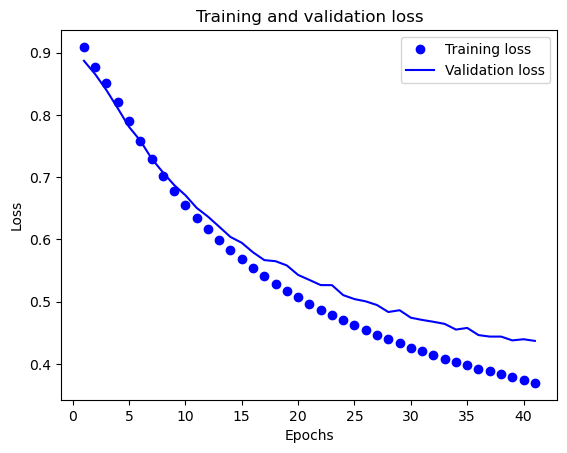

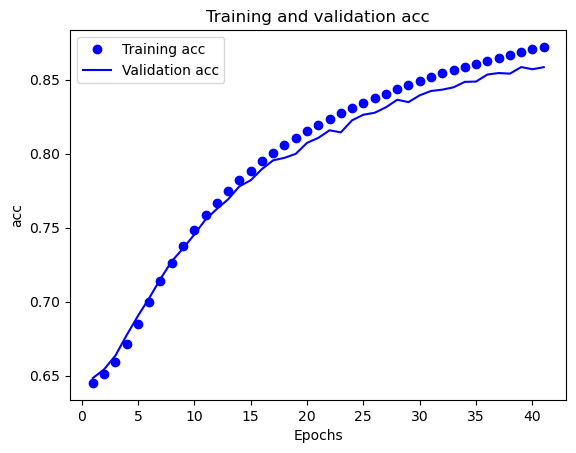

In [15]:
Path = "model1"
Dir = "my_log_dir"   
Call_B_Fun = callbacks(Path,Dir)

batch_size = 512            
epochs = 200                

history = model.fit(x_train, y_train,
                    batch_size=batch_size, epochs = epochs,
                    validation_split = 0.2, callbacks=Call_B_Fun)

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plot(loss,val_loss,acc,val_acc)

In [16]:
# saving our model
model.save('model1/emg_1.h5')

In [17]:
#################

In [18]:
# loading saved model
from tensorflow.keras.models import load_model
emg = 'model1/emg_1.h5'
emg_model = load_model(emg)
#emg_model.summary()

In [19]:
# Removing layers

new_model = Model(emg_model.inputs, emg_model.layers[-2].output) # removing layers
new_model.summary()
# removed all layers except conv

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │         9,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 610,016 (2.33 MB)

 Trainable params: 610,016 (2.33 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
from tensorflow.keras import layers, optimizers, Input, Model

input_tensor = Input(shape=(8,))
x = new_model(input_tensor)       # this is our old model
#z = layers.Dense(256, activation='relu')(x)
output_tensor = layers.Dense(8, activation='softmax')(x)

model = Model(input_tensor, output_tensor)

#SGD #RMSprop #Adam #Adadelta #Adagrad ##Adamax ###Nadam #Ftrl
opt = optimizers.Nadam(learning_rate=1e-3)
model.compile(optimizer = opt, 
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_1 (Functional)       │ (None, 32)             │       610,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 610,280 (2.33 MB)

 Trainable params: 610,280 (2.33 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
def callbacks(Log, Dir):
    import tensorflow as tf
    import os

    Filepath = Log  # Directorio base
    logdir = os.path.join(Filepath, Dir)  # Directorio para logs de TensorBoard

    # Crear el directorio si no existe
    if not os.path.exists(Filepath):
        os.makedirs(Filepath)

    callbacks_list = [
        tf.keras.callbacks.TensorBoard(
            log_dir=logdir,  # Ruta para logs de TensorBoard
            histogram_freq=1,
        ),
        tf.keras.callbacks.EarlyStopping(  # Detener si no mejora
            monitor='val_loss', 
            patience=2,
        ),
        tf.keras.callbacks.ReduceLROnPlateau(  # Reducir tasa de aprendizaje si no mejora
            monitor='val_loss',
            factor=0.1, 
            patience=10,
        ),
        tf.keras.callbacks.ModelCheckpoint(
            filepath=os.path.join(Filepath, "best_model.keras"),  # Guardar como .keras
            monitor='val_loss', 
            save_best_only=True,  # Guardar solo el mejor modelo
        ),
    ]
    return callbacks_list


Epoch 1/200


c:\Users\italo\anaconda3\envs\mne\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['input_layer']. Received: the structure of inputs=*
  warnings.warn(


5298/5298 ━━━━━━━━━━━━━━━━━━━━ 56s 10ms/step - accuracy: 0.6497 - loss: 1.1976 - val_accuracy: 0.8068 - val_loss: 0.5328 - learning_rate: 0.0010
Epoch 2/200
5298/5298 ━━━━━━━━━━━━━━━━━━━━ 53s 10ms/step - accuracy: 0.8336 - loss: 0.4546 - val_accuracy: 0.8416 - val_loss: 0.4659 - learning_rate: 0.0010
Epoch 3/200
5298/5298 ━━━━━━━━━━━━━━━━━━━━ 57s 11ms/step - accuracy: 0.8576 - loss: 0.4005 - val_accuracy: 0.8527 - val_loss: 0.4445 - learning_rate: 0.0010
Epoch 4/200
5298/5298 ━━━━━━━━━━━━━━━━━━━━ 68s 13ms/step - accuracy: 0.8645 - loss: 0.3850 - val_accuracy: 0.8506 - val_loss: 0.4495 - learning_rate: 0.0010
Epoch 5/200
5298/5298 ━━━━━━━━━━━━━━━━━━━━ 85s 16ms/step - accuracy: 0.8682 - loss: 0.3762 - val_accuracy: 0.8580 - val_loss: 0.4353 - learning_rate: 0.0010
Epoch 6/200
5298/5298 ━━━━━━━━━━━━━━━━━━━━ 90s 17ms/step - accuracy: 0.8714 - loss: 0.3685 - val_accuracy: 0.8590 - val_loss: 0.4324 - learning_rate: 0.0010
Epoch 7/200
5298/5298 ━━━━━━━━━━━━━━━━━━━━ 72s 14ms/step - accuracy: 0

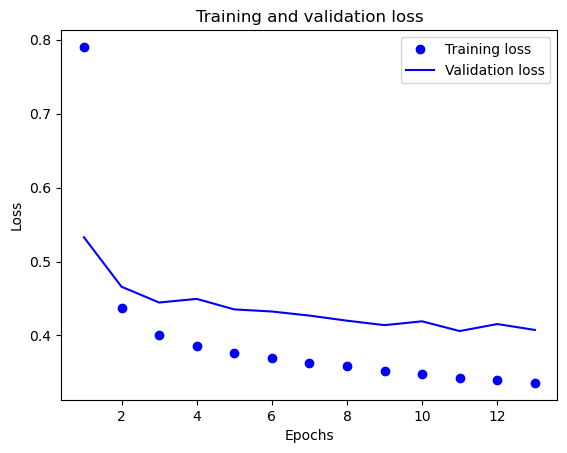

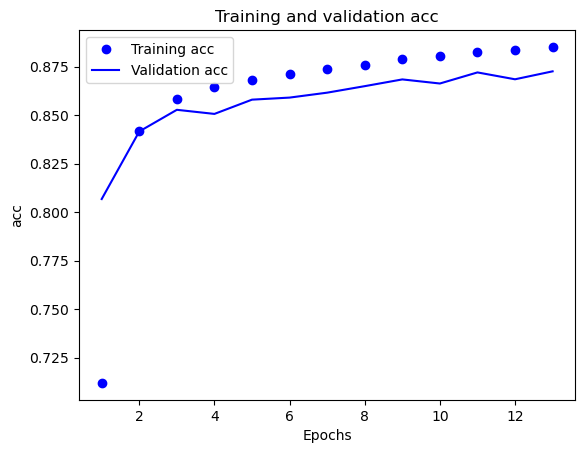

In [30]:
Path = "model2"
Dir = "my_log_dir"   
Call_B_Fun = callbacks(Path,Dir)

batch_size = 512            
epochs = 200                

history = model.fit(x_train, y_train,
                    batch_size=batch_size, epochs = epochs,
                    validation_split = 0.2, callbacks=Call_B_Fun)

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plot(loss,val_loss,acc,val_acc)

In [31]:
# saving our model
model.save('model2/emg_2.h5')

In [32]:
###################

In [33]:
# loading saved model
from tensorflow.keras.models import load_model
emg = 'model2/emg_2.h5'
emg_model = load_model(emg)
#emg_model.summary()

In [35]:
from tensorflow.keras import layers, Sequential, optimizers, Input, Model

input_tensor = Input(shape=(8,))
x = layers.Dense(1024, activation='relu')(input_tensor)
y = layers.Dense(512, activation='relu')(x)
z = layers.Dense(256, activation='relu')(y)
z = layers.Dense(128, activation='relu')(z)
z = layers.Dense(64, activation='relu')(z)
z = layers.Dense(32, activation='relu')(z)
z = layers.Dense(128, activation='relu')(y) # acyclic graghs of layers
z = layers.Dense(64, activation='relu')(z)
z = layers.Dense(32, activation='relu')(z)
output_tensor = layers.Dense(8, activation='softmax')(z)

model = Model(input_tensor, output_tensor)

opt = optimizers.Nadam(learning_rate=1e-3)
model.compile(optimizer = opt, 
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

model.set_weights(emg_model.get_weights())   # using pretrained model weights

#model.summary()

In [37]:
callbacks_list = [
    tf.keras.callbacks.EarlyStopping(   # Detener si no mejora
        monitor='val_accuracy',  # Cambiar 'acc' por 'val_accuracy' (nomenclatura actual)
        patience=5
    ),
    tf.keras.callbacks.ModelCheckpoint(
        filepath='my_model.keras',  # Cambiar extensión a .keras
        monitor='val_loss',         # Guardar solo si mejora la pérdida de validación
        save_best_only=True
    )
]

batch_size = 512           
epochs = 15                

history = model.fit(
    x_train, y_train,
    batch_size=batch_size, 
    epochs=epochs,
    validation_split=0.2,
    callbacks=callbacks_list
)


Epoch 1/15
5298/5298 ━━━━━━━━━━━━━━━━━━━━ 51s 9ms/step - accuracy: 0.8875 - loss: 0.3293 - val_accuracy: 0.8681 - val_loss: 0.4156
Epoch 2/15
5298/5298 ━━━━━━━━━━━━━━━━━━━━ 51s 10ms/step - accuracy: 0.8887 - loss: 0.3256 - val_accuracy: 0.8768 - val_loss: 0.3976
Epoch 3/15
5298/5298 ━━━━━━━━━━━━━━━━━━━━ 49s 9ms/step - accuracy: 0.8904 - loss: 0.3218 - val_accuracy: 0.8791 - val_loss: 0.3939
Epoch 4/15
5298/5298 ━━━━━━━━━━━━━━━━━━━━ 62s 12ms/step - accuracy: 0.8917 - loss: 0.3193 - val_accuracy: 0.8761 - val_loss: 0.4014
Epoch 5/15
5298/5298 ━━━━━━━━━━━━━━━━━━━━ 67s 13ms/step - accuracy: 0.8927 - loss: 0.3164 - val_accuracy: 0.8805 - val_loss: 0.3896
Epoch 6/15
5298/5298 ━━━━━━━━━━━━━━━━━━━━ 68s 13ms/step - accuracy: 0.8941 - loss: 0.3128 - val_accuracy: 0.8836 - val_loss: 0.3842
Epoch 7/15
5298/5298 ━━━━━━━━━━━━━━━━━━━━ 65s 12ms/step - accuracy: 0.8952 - loss: 0.3102 - val_accuracy: 0.8811 - val_loss: 0.3891
Epoch 8/15
5298/5298 ━━━━━━━━━━━━━━━━━━━━ 66s 12ms/step - accuracy: 0.8963 - l

In [38]:
model.save('emg_3.h5')

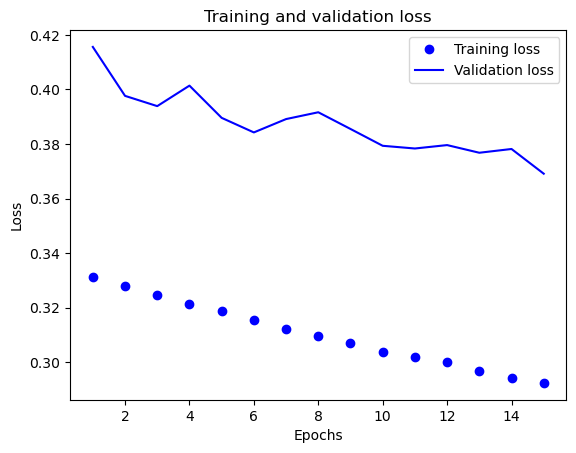

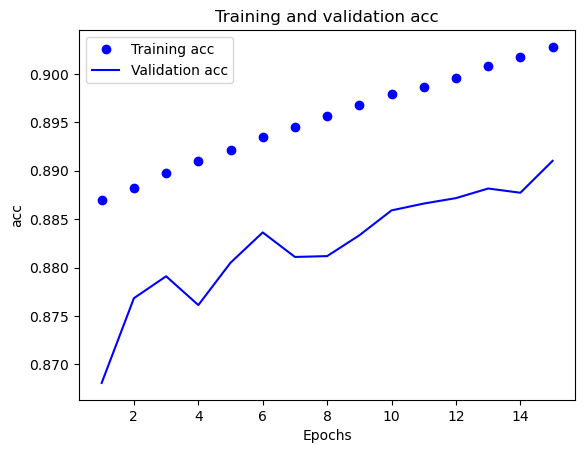

In [39]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plot(loss,val_loss,acc,val_acc)

In [40]:
evaluation = model.evaluate(x_test,  y_test,batch_size=batch_size, verbose=2)
print()
print("Test loss :",evaluation[0]*100,"%")
print("Test accuracy :",evaluation[1]*100,"%")

1656/1656 - 5s - 3ms/step - accuracy: 0.8907 - loss: 0.3700

Test loss : 37.000659108161926 %
Test accuracy : 89.07433152198792 %


In [41]:
predict = 105
a = np.argmax(model.predict(x_test)[predict])
print("Predicted Class: ",a)
print("Actual Class: ",np.argmax(y_test[predict]))

26487/26487 ━━━━━━━━━━━━━━━━━━━━ 25s 928us/step
Predicted Class:  7
Actual Class:  7
